Introduction

The baseball dataset is utilize data from 2014 Major League Baseball season. Under this case study we will pridicts the number of wins
to 2015 teams on the basis of 30 instances and 17 features like Runs,At Bats.Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Base,Runs allowed,Earned Runs,Earned Run Average(ERA),Shutouts,Saves and Error

In [58]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


Uploading data into dataset "df"

In [59]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [60]:
df.shape

(30, 17)

dataset has 30 rows and 17 columns

The dataset has 30 rows and 17 columns

In [61]:
df.keys

<bound method NDFrame.keys of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26 

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [63]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

The dataset has all numeric datatype

In [64]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Its is good sign that we have no null values in given dataset

In [65]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


The statistics shows that there is big diffrence in minimum-maximum,mean and 50% which indicate that some of the columns outliers are presents and the dataset  is bit skewed.

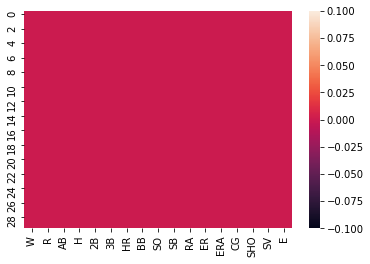

In [66]:
sns.heatmap(df.isnull())

There is no null value in given dataset

In [67]:
dfcor=df.corr()# Checking correlations
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


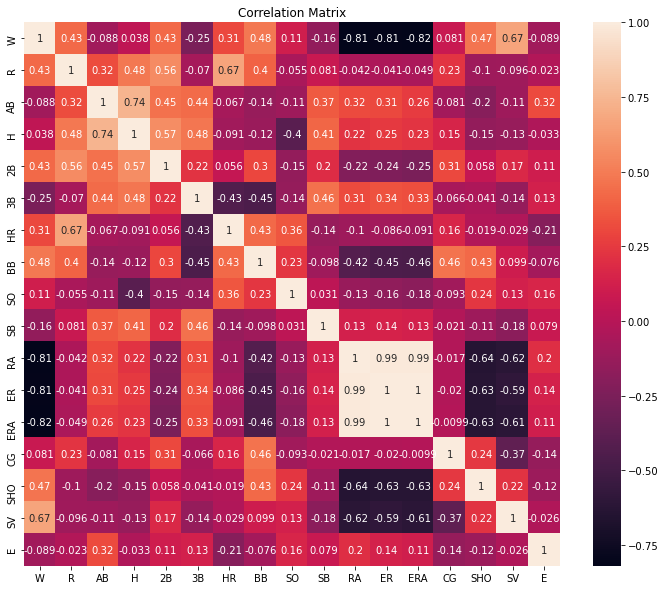

In [68]:
plt.figure(figsize=(12,10))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

As per the heatmap some of the columens are positvely correlated with Wins and some of the columns are negatively correlated with our target "win"

In [69]:
corr_matrix=df.corr()

In [70]:
corr_matrix["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

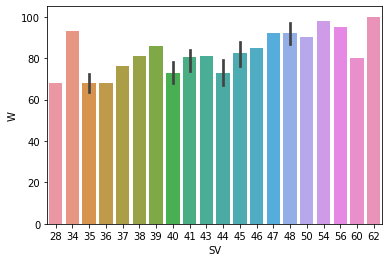

In [71]:
sns.barplot(x="SV",y="W",data=df)

Barplot shows that s(saves)and W(wins) has positive correltation.Increment in number of S(save) increase the probability of W(wins)

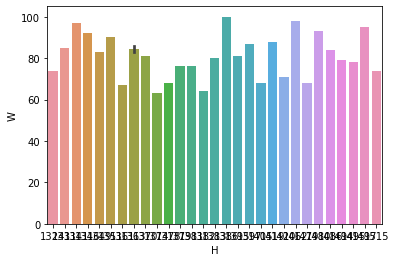

In [72]:
sns.barplot(x="H",y="W",data=df)

The above graph shows that the H(Hit) is moderately correlated with W (Wins)

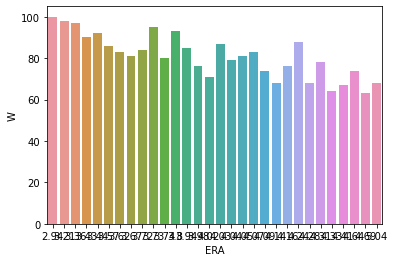

In [73]:
sns.barplot(x="ERA",y="W",data=df)

ERA(Earn run Average) is slightly negativly correlated with W(Win)

W          AxesSubplot(0.125,0.71587;0.133621x0.16413)
R       AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AB       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
H       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
2B      AxesSubplot(0.766379,0.71587;0.133621x0.16413)
3B        AxesSubplot(0.125,0.518913;0.133621x0.16413)
HR     AxesSubplot(0.285345,0.518913;0.133621x0.16413)
BB      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
SO     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
SB     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
RA        AxesSubplot(0.125,0.321957;0.133621x0.16413)
ER     AxesSubplot(0.285345,0.321957;0.133621x0.16413)
ERA     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
CG     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
SHO    AxesSubplot(0.766379,0.321957;0.133621x0.16413)
SV           AxesSubplot(0.125,0.125;0.133621x0.16413)
E         AxesSubplot(0.285345,0.125;0.133621x0.16413)
dtype: object

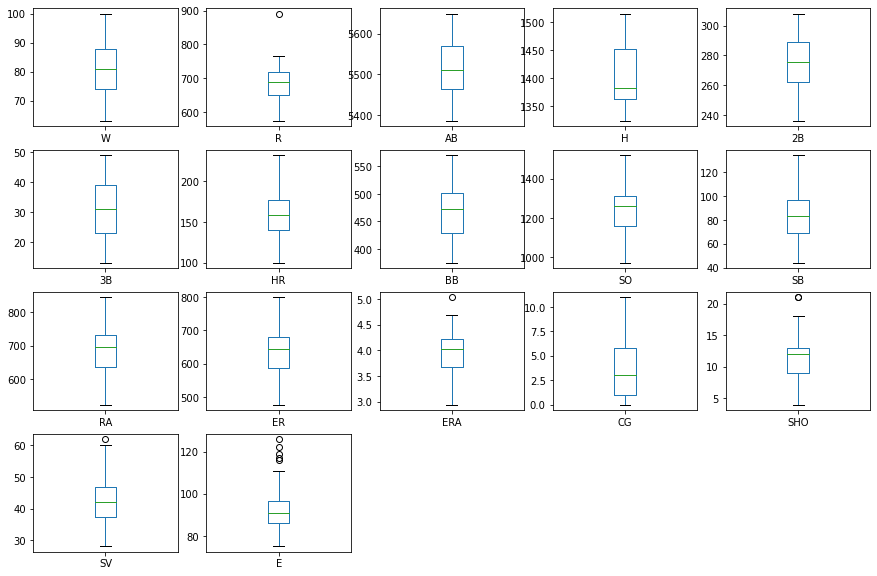

In [74]:
df.plot(kind='box',subplots=True, layout=(4,5), figsize= (15,10)) #Checking outliers

Column "E","SV","SHO","ERA" and "R" has outliers. Lets remove it to increase the model accuracy

In [75]:
#removing outlieers
from scipy.stats import zscore
z=np.abs(zscore(df))
z


array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [76]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [77]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


In [78]:
loss_percent=(30-29)/30*100
print(loss_percent)

3.3333333333333335


In [79]:
# spliting the independent and target variables in x and y
x=df.drop("W",axis=1)
y=df["W"]

In [80]:
x.skew() #checking skewness

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [81]:
skew=("R","E","SV","CG")
for col in skew :
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [82]:
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO    0.565790
SV     0.163057
E      0.632916
dtype: float64

In [83]:
x=df

In [84]:
x

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,6.586172,5575,1497,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051,4.488636
1,83,6.546785,5467,1349,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641,4.465908
2,81,6.507278,5439,1395,303,29,141,533,1157,86,640,584,3.67,2.484907,10,3.663562,4.382027
3,76,6.434547,5533,1381,260,27,136,404,1231,68,701,643,3.98,2.079442,9,3.637586,4.624973
4,74,6.536692,5605,1515,289,49,151,455,1259,83,803,746,4.64,2.079442,12,3.583519,4.465908
5,93,6.793466,5509,1480,308,17,232,570,1151,88,670,609,3.80,2.079442,10,3.555348,4.488636
6,87,6.639876,5567,1397,272,19,212,554,1227,63,698,652,4.03,1.386294,4,3.891820,4.543295
7,81,6.570883,5485,1370,246,20,217,418,1331,44,693,646,4.05,0.000000,10,3.784190,4.356709
8,80,6.469250,5485,1383,278,32,167,436,1310,87,642,604,3.74,0.693147,12,4.110874,4.564348
9,78,6.618739,5640,1495,294,33,161,478,1148,71,753,694,4.31,1.386294,10,3.713572,4.584967


scalling training testing and hypertuninig of model

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.3654086 ,  0.66532946,  0.84773126,  1.66368512,  1.42017307,
         1.04119304, -0.7872986 , -1.53490242, -2.69762957,  0.91388329,
        -0.66623393, -0.50511008, -0.50695519, -0.27892148, -0.81462859,
         1.58127344, -0.42706021],
       [ 0.1978383 ,  0.17956168, -0.71109353, -0.97068076,  0.12740339,
         1.23580856, -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,
         0.16597077,  0.24892985,  0.25459752, -0.27892148,  0.1728    ,
         0.336185  , -0.59169263],
       [ 0.00324325, -0.30770406, -1.1152333 , -0.15189137,  1.58879521,
        -0.22380785, -0.7233772 ,  1.13914361, -0.89398189,  0.11144918,
        -0.68033909, -0.75162313, -0.64134684,  1.76277761, -0.32091429,
        -0.62244106, -1.19928939],
       [-0.48324437, -1.20472969,  0.24152162, -0.40108814, -0.82812203,
        -0.41842337, -0.8831807 , -1.16053598, -0.16860185, -0.69098493,
         0.18007593,  0.10392217,  0.05301004,  1.16561891, -0.56777144,
        -0.77328196

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.28,random_state=42)

In [87]:
x_train.shape

(21, 17)

In [88]:
y_train.shape

(21,)

In [89]:
x_test.shape

(9, 17)

In [90]:
lm=LinearRegression()

In [91]:
lm.fit(x_train,y_train)

LinearRegression()

In [92]:
lm.coef_

array([ 1.02777538e+01, -1.12859646e-15,  4.09534569e-15, -4.04264076e-15,
       -4.50599105e-15,  1.29093423e-14, -9.44274973e-15,  2.73298133e-15,
        3.33084235e-15, -2.54443630e-15, -8.92018523e-15,  7.82642439e-15,
       -2.85001324e-15, -4.05491864e-15, -7.30992940e-15, -7.00012515e-15,
       -2.38684962e-15])

In [93]:
lm.intercept_

80.96666666666667

In [94]:
lm.score(x_train,y_train)

1.0

In [95]:
pred=lm.predict(x_test)
print("Predicte W:",pred)
print("actual W",y_test)

Predicte W: [ 79. 100.  67.  97.  80.  78.  74.  63.  85.]
actual W 27     79
15    100
23     67
17     97
8      80
9      78
28     74
24     63
12     85
Name: W, dtype: int64


In [96]:
print ('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.5000346643824338e-14
Mean squared error: 2.9731291005663025e-28
Root mean squared error: 1.7242763991211798e-14


In [97]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

1.0


In [98]:
from sklearn.linear_model import Lasso,Ridge

In [99]:
ls= Lasso(alpha=0.1)
#ls=Lasso(alpha=1.0)#default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9998777186738154

In [100]:
ls.coef_

array([10.16410144,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ])

In [101]:
ls.coef_

array([10.16410144,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ])

In [102]:
#ElasticNet is a combinations of both Lasso and Ridge
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.1)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.9916275803141716


array([ 6.16629107,  1.50473824, -0.06513311,  0.50352414,  0.04752519,
        0.        ,  0.        ,  0.        , -0.01252263, -0.09715201,
       -0.37137804, -0.71376115, -0.90954753,  0.1909522 ,  0.24957889,
        1.81785991, -0.        ])

In [103]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf','sigmoid']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.9851130487369778
0.4662674317957539
0.24705486900500995
0.5282578143454661


In [104]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=57)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


0.8835840759075907
Mean absolute error: 1.5000346643824338e-14
Mean squared error: 2.9731291005663025e-28
Root mean squared error: 1.7242763991211798e-14


In [105]:
from sklearn.model_selection import cross_val_score
lm=LinearRegression()
score=cross_val_score(lm, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.8835840759075907

In [106]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
score=cross_val_score(rf, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.8835840759075907

In [107]:
from sklearn.model_selection import cross_val_score
enr=ElasticNet(alpha=0.1)
score=cross_val_score(enr, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.8835840759075907

In [108]:
from sklearn.model_selection import cross_val_score
ls=Lasso(alpha=0.0001)
score=cross_val_score(ls, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.8835840759075907

Minimum difference in accuracy and cross validation score is for RandomForestRegressor so this our best moder

Using GridSearchCV with CV for Hyper tuning the dataset

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
grid=GridSearchCV(rf,parameters)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [110]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf_decision=rf.predict(x_test)
rfs=r2_score(y_test,predrf_decision)
print("R2 Score:",rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print("corss val score:",rfc*100)

R2 Score: 86.18218646864688
corss val score: 77.59847129007102


In [111]:
import joblib
joblib.dump(rf,"baseball.casestudy")

['baseball.casestudy']

In [112]:
p=joblib.load("baseball.casestudy")

In [113]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [114]:
df_com

,original,predicted
0,79,81.58
1,100,92.27
2,67,69.52
3,97,91.40
4,80,83.49
5,78,73.95
6,74,71.64
7,63,68.24
8,85,83.68
